In [563]:

from pydoc import describe
from unicodedata import decimal
from pyextremes import EVA,get_extremes , __version__
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import datetime
from dateutil.relativedelta import relativedelta
from scipy.signal import find_peaks
import pdb

In [564]:
def loadCsv(path):
    loader = pd.read_csv(path, index_col=0,delimiter=',', parse_dates=True).squeeze()
    return loader

def loadCsvNoInd(path):
    loader = pd.read_csv(path,delimiter=',', parse_dates=True).squeeze()
    return loader

In [565]:
# DATA FILES should be replaced with the name of the files that contain the data - Data files can be provided upon request. This is an example related to a publication
FILEname1 = 'zarco_data'
FILEname2='joao_data'
FilenNameext1 = '.csvextremes.csv'
FilenNameext2 ='.csvrelated2extrems.csv'
FilenNameext3 = '.csvreturnValues.csv'
FileNameext4 = '.csvobservedExtremes.csv'
FILE1 = FILEname1+FilenNameext1
FILE2 =FILEname1+FilenNameext2
FILE3 =FILEname2+FilenNameext1
FILE4=FILEname2+FilenNameext2
FILE5=FILEname1+FilenNameext3
FILE6=FILEname2+FilenNameext3
FILE7 = FILEname1+FileNameext4
FILE8 = FILEname2+FileNameext4  
UPTOCOLUMN= 5
data1a = loadCsv(FILE1)
data1b=loadCsvNoInd(FILE2)
data1c =loadCsvNoInd(FILE5)
data2a = loadCsv(FILE3)
data2b=loadCsvNoInd(FILE4)
data2c =loadCsvNoInd(FILE6)

dataobserved1 = loadCsv(FILE7)
dataobserved2= loadCsv(FILE8)

# print(data.head())
# print(data.describe())
# print(data1b.info())
# # data.dropna(inplace=True)
# print(data1b.info())
# print(data1b.head())


In [566]:

def calculate_empirical_r2(observed_extremes, model_values):
    """
    Calculate empirical R^2 by comparing observed extremes with model values.
    
    Parameters:
        observed_extremes (list or np.array): Observed extreme values.
        model_values (list or np.array): Predicted or modeled values (e.g., EVA return values, EVDBM scores).
        
    Returns:
        float: The R^2 value.
    """
    # Ensure inputs are numpy arrays
    observed_extremes = np.array(observed_extremes)
    model_values = np.array(model_values)

    # Match lengths by truncating observed extremes to the length of model values
    observed_extremes = observed_extremes[:len(model_values)]

    # Calculate R^2
    ss_total = np.sum((observed_extremes - np.mean(observed_extremes))**2)
    ss_residual = np.sum((observed_extremes - model_values)**2)
    r2 = 1 - (ss_residual / ss_total)

    return r2

In [567]:
def calculate_mae_mse(observed_extremes, model_values):
    """
    Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE).

    Parameters:
        observed_extremes (list or np.array): Observed extreme values.
        model_values (list or np.array): Predicted or modeled values (e.g., EVA return values, EVDBM scores).

    Returns:
        tuple: MAE and MSE values.
    """
    # Ensure inputs are numpy arrays
    observed_extremes = np.array(observed_extremes)
    model_values = np.array(model_values)

    # Match lengths by truncating observed extremes to the length of model values
    observed_extremes = observed_extremes[:len(model_values)]

    # Calculate MAE
    mae = np.mean(np.abs(observed_extremes - model_values))

    # Calculate MSE
    mse = np.mean((observed_extremes - model_values)**2)

    return mae, mse

In [568]:
print(data1c['return value'].to_numpy())
print(dataobserved1.to_numpy())
calculate_empirical_r2(dataobserved1.to_numpy(),data1c['return value'].to_numpy())
R2threshold = calculate_empirical_r2(dataobserved1.to_numpy(),data1c['return value'].to_numpy())
print(R2threshold) # scenario 1

MAE1,MSE1 = calculate_mae_mse(dataobserved1.to_numpy(),data1c['return value'].to_numpy())
print(MAE1,MSE1)
print(data2c['return value'].to_numpy())
print(dataobserved2.to_numpy())
calculate_empirical_r2(dataobserved2.to_numpy(),data2c['return value'].to_numpy())
R2threshold2 = calculate_empirical_r2(dataobserved2.to_numpy(),data2c['return value'].to_numpy())
print(R2threshold2) # scenario 2

MAE2,MSE2 = calculate_mae_mse(dataobserved2.to_numpy(),data2c['return value'].to_numpy())


[3.48582671e-01 1.53860935e-01 5.21926505e-02 2.30373185e-02
 7.81471079e-03 3.44933587e-03 1.52250266e-03 5.16462797e-04
 2.27961559e-04 1.00619972e-04]
[11.    8.   11.5  16.25 14.   14.25  8.75  0.5   3.   10.25  4.75 14.25
 15.25  1.75 14.5   5.5   6.75  5.75 11.5   5.5   0.    9.   13.75 11.75
 12.5   6.75 12.75  7.5  17.   17.25  2.75  7.75 14.   12.75 18.    4.
  9.5   1.25  0.    3.75  2.5  10.25  5.75  6.75 16.   13.    8.5   9.5
  0.    3.   15.25  4.75 10.5  10.    8.75 17.25 15.25 15.5  15.75 13.
  6.5  15.75 11.75 17.   15.75  1.25  6.75 13.75  1.5   2.  ]
-4.2531266502450435
9.690869483059053 115.89710672103126
[1.04608331 0.65805569 0.38590489 0.27873018 0.2035611  0.17395903
 0.15695027 0.14502084 0.14032296 0.13762365]
[10.25  5.75  8.5  10.25 11.    9.25 11.   10.5   0.25  7.25 10.5   2.5
  4.25  5.25  4.5   9.25  6.5   8.75 12.25 11.5   4.5   3.    7.25  9.
 13.25  9.   11.75 13.25 13.    7.5   7.5  12.5  10.    8.25  7.5   2.5
 11.25 10.25  4.    6.    0.5   2.5   7

In [569]:
print(data2a)

                time  count
year                       
2018-01-01  13:00:00      2
2018-01-01  14:00:00      2
2018-01-01  15:00:00      1
2018-01-01  16:00:00      4
2019-01-01  13:00:00     13
2019-01-01  14:00:00      2
2019-01-01  15:00:00      6
2019-01-01  16:00:00     11
2020-01-01  13:00:00      3
2020-01-01  14:00:00      3
2020-01-01  15:00:00      7
2020-01-01  16:00:00     15


In [570]:
from itertools import product

def optimize_weights_eva(observed_extremes, eva_r2_threshold, Px, Pxlower, Pxupper, Normalized, weight_ranges):
    """
    Optimize weights for EVDBM to maximize R^2 and exceed the EVA R^2 threshold.
    
    Parameters:
        observed_extremes (list or np.array): Observed extremes.
        eva_r2_threshold (float): EVA R^2 threshold for comparison.
        Px, Pxlower, Pxupper (list): Probabilities for BenchmarkingScore.
        Normalized (pd.DataFrame): Normalized variables for EVDBM.
        weight_ranges (list): Ranges of weights to explore for each variable.
        
    Returns:
        dict: Best weights and corresponding R^2 value.
    """
    best_r2 = -float('inf')
    best_weights = None
    best_mae = float('inf')  # Initialize to large value
    best_mse = float('inf')  # Initialize to large value

    for weights in product(*weight_ranges):  # Generate all weight combinations
        # Calculate SumweightedCircumstances
        weighted_sums = []
        for norm in Normalized.values:
            weighted_sums.append(SumweightedCircumstances(weights, norm))
        
        # Calculate Benchmarking Scores
        Scores, _, _ = BenchmarkingScore(np.mean(weighted_sums), Px, Pxlower, Pxupper)
        
        # Ensure consistent lengths
        Scores = np.array(Scores)
        normalized_observed = observed_extremes[:len(Scores)]
        
        # Normalize observed extremes to the range of EVDBM scores
        normalized_observed = (normalized_observed - np.min(observed_extremes)) / (np.max(observed_extremes) - np.min(observed_extremes)) * (np.max(Scores) - np.min(Scores)) + np.min(Scores)
        
        # Calculate R^2 for EVDBM --- Main focus here to reduce MSE
        ss_total = np.sum((normalized_observed - np.mean(normalized_observed))**2)
        ss_residual = np.sum((normalized_observed - Scores)**2)
        r2 = 1 - (ss_residual / ss_total)
        
        # Update best weights if R^2 exceeds EVA threshold
        if r2 > eva_r2_threshold and r2 > best_r2:
            best_r2 = r2
            MAE,MSE = calculate_mae_mse(observed_extremes, Scores)
            best_weights = weights

    return {"best_weights": best_weights, "best_r2": best_r2,"best_MAE":MAE,"best_MSE":MSE}

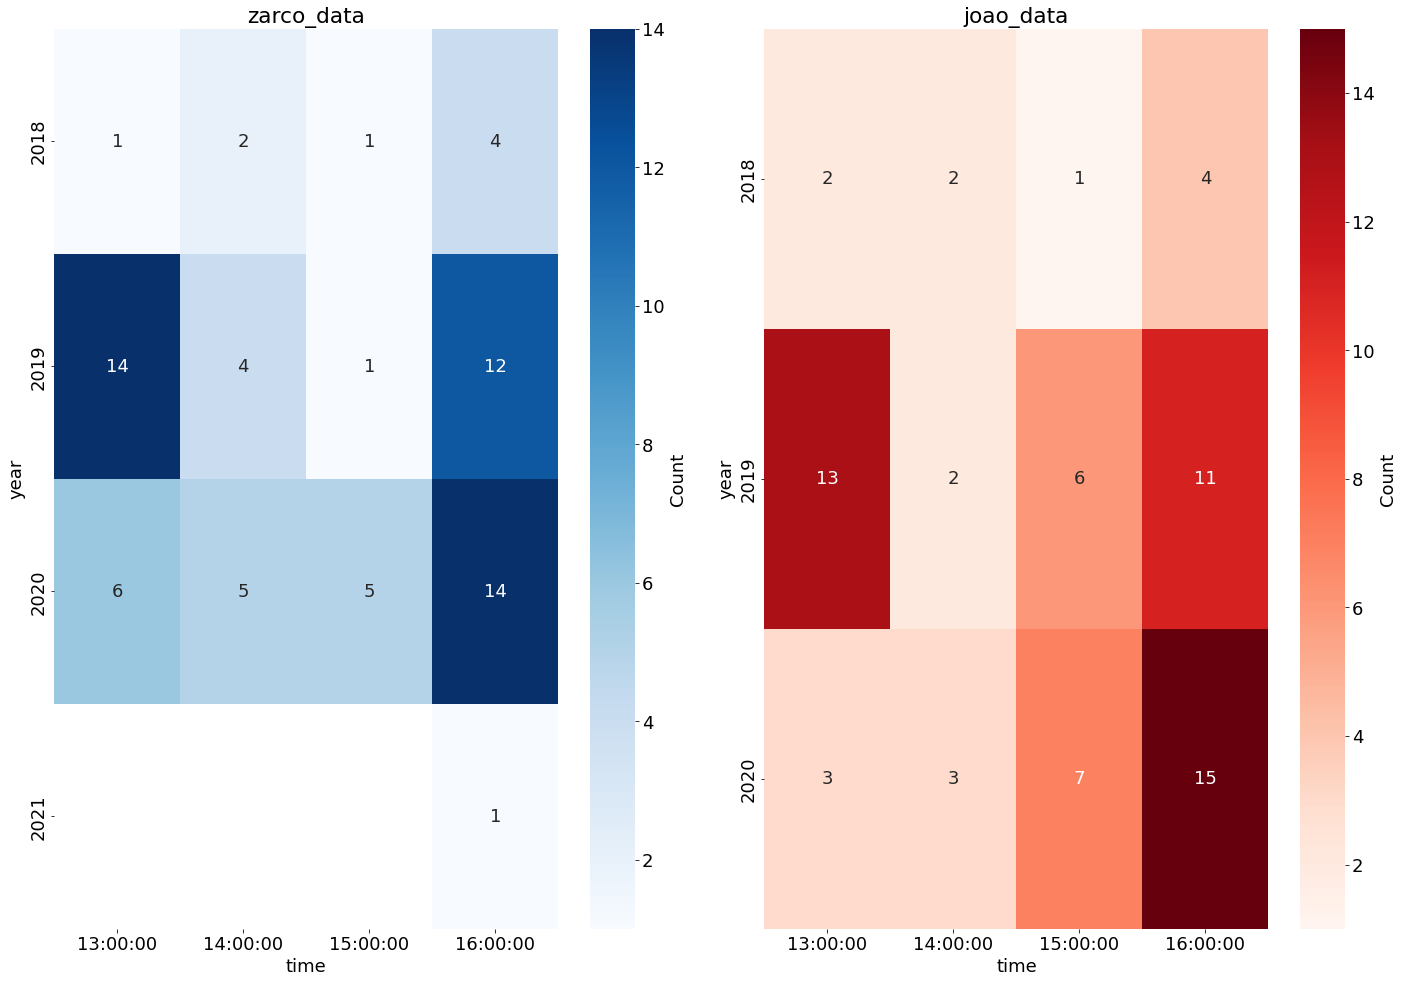

In [571]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 and df2 are the two dataframes you're comparing

# Pivot tables to get years on the rows and times on the columns
pivot1 = data1a.pivot_table(index=data1a.index.year, columns='time', values='count')
pivot2 = data2a.pivot_table(index=data2a.index.year, columns='time', values='count')
# Set global font size
plt.rcParams.update({'font.size': 18})

# Create a figure with two subplots for comparison
plt.figure(figsize=(20, 14))

# Heatmap for the first dataset
plt.subplot(1, 2, 1)
sns.heatmap(pivot1, annot=True, cmap='Blues', cbar_kws={'label': 'Count'})
plt.title(FILEname1)

# Heatmap for the second dataset
plt.subplot(1, 2, 2)
sns.heatmap(pivot2, annot=True, cmap='Reds', cbar_kws={'label': 'Count'})
plt.title(FILEname2)

plt.tight_layout()
plt.show()

In [572]:
# print(data1b.iloc[:,:-5].mean())
# print(data2b.iloc[:,:-5].mean())    

# print(data1b.iloc[:,:-5].mean()- data2b.iloc[:,:-5].mean())
# Delta= data1b.iloc[:,:-5].mean()- data2b.iloc[:,:-5].mean()

In [573]:
# The Normalized calucations for related circumstances are as follows:
def Normalization(min,max,mean):
    return (mean-min)/(max-min)

Normalized1b = Normalization(data1b.iloc[:,:-UPTOCOLUMN].min(),data1b.iloc[:,:-UPTOCOLUMN].max(),data1b.iloc[:,:-UPTOCOLUMN].mean())
Normalized2b = Normalization(data2b.iloc[:,:-UPTOCOLUMN].min(),data2b.iloc[:,:-UPTOCOLUMN].max(),data2b.iloc[:,:-UPTOCOLUMN].mean())
print(data1b.iloc[:,:-5].mean())
print(data2b.iloc[:,:-5].mean())

print(Normalized1b)
print(Normalized2b)

Humidity               67.728571
Temperature            18.742857
cloudcover             55.457143
windspeedKmph          18.500000
Solar w/m2            368.734781
Diffuse Solar w/m2    241.513144
dtype: float64
Humidity               69.057971
Temperature            18.463768
cloudcover             58.202899
windspeedKmph          18.202899
Solar w/m2            367.013457
Diffuse Solar w/m2    221.890545
dtype: float64
Humidity              0.483587
Temperature           0.518681
cloudcover            0.554571
windspeedKmph         0.453125
Solar w/m2            0.334679
Diffuse Solar w/m2    0.503480
dtype: float64
Humidity              0.481159
Temperature           0.538647
cloudcover            0.582029
windspeedKmph         0.307044
Solar w/m2            0.340758
Diffuse Solar w/m2    0.487093
dtype: float64


In [574]:
def ProbabilityScale(data,dataforCount,TotalCases):
    # also to calculate historical occurences as E_c = \frac{N}{\sum_{k=1}^{m} N_k}
    Ec =dataforCount.count()[1]/TotalCases
    # print(Ec)
    T=[]
    x0=[]
    xlower=[]
    xupper=[]
    P = []
    Plower=[]
    Pupper=[]
    for i in range(len(data)):
        T.append(data['return period'][i])
        # P.append(1/data['return period'][i])
        x0.append(data['return value'][i])
        xlower.append(data['lower ci'][i])
        xupper.append(data['upper ci'][i])
        
        # Probability score is 1/return period * return value 0, lower and upper thus we have 3 Ps
        P.append(Ec*(1/T[i])*x0[i])
        Plower.append(Ec*(1/T[i])*xlower[i])
        Pupper.append(Ec*(1/T[i])*xupper[i])

        # Plower.append(1/data['return period'][i])*data['lower ci'][i]
        # Pupper.append(1/data['return period'][i])*data['upper ci'][i]
    print(P)
    return P,Plower,Pupper,T,x0,xlower,xupper
        # print(data[i:i+1])


In [575]:
def SumweightedCircumstances(weights, Normalized):
    """
    Sum weighted circumstances using weights and normalized data.

    Parameters:
        weights (list or array): Weights for the variables.
        Normalized (list, array, or scalar): Normalized variable data.

    Returns:
        float: Sum of weighted values.
    """
    if isinstance(Normalized, (np.float64, float)):  # Handle scalar input
        Normalized = [Normalized]

    s = []
    for i, weight in zip(Normalized, weights):  # Ensure Normalized is iterable
        s.append(i * weight)

    return sum(s)

In [576]:
# SumweightedCircumstances(weights,Normalized2b)


In [577]:
TotalCases = data1b.count()[1]+data2b.count()[1]    

# print(Plower)
# print(P)
# print(Pupper)

def BenchmarkingScore(SumweightedCircumstances,Px,Pxlower,Pxupper):
    print(SumweightedCircumstances)
    ScoreInTimex= []
    ScoreInTimelower=[]
    ScoreInTimeUppder=[]
    for i in range(len(Px)):
        # print(P[i])
        ScoreInTimex.append(Px[i]*SumweightedCircumstances)
        ScoreInTimelower.append(Pxlower[i]*SumweightedCircumstances) 
        ScoreInTimeUppder.append(Pxupper[i]*SumweightedCircumstances)

    return ScoreInTimex,ScoreInTimelower,ScoreInTimeUppder




In [578]:
weight_ranges = [
    np.arange(0.05, 0.2, 0.05),  # Humidity
    np.arange(0.1, 0.3, 0.05),  # Temperature
    np.arange(0.1, 0.4, 0.1),   # Cloud Cover
    np.arange(0.05, 0.2, 0.05), # Wind Speed
    np.arange(0.3, 0.5, 0.1),   # Solar w/m²
    np.arange(0.2, 0.4, 0.1)    # Diffuse Solar w/m²
]

In [579]:
# Optimize weights for Scenario 1
P1,Plower1,Pupper1,T1,x01,xlower1,xupper1 =ProbabilityScale(data1c,data1b,TotalCases)



[0.17554523014635268, 0.038741962175357046, 0.005256813715538846, 0.0011601527307834366, 0.00015741863459825292, 3.4741512385207334e-05, 7.667279581563453e-06, 1.0403567140575253e-06, 2.296015700996978e-07, 5.0671928461e-08]


In [580]:
result1 = optimize_weights_eva(
    dataobserved1.to_numpy(),
    R2threshold,
    P1, Plower1, Pupper1,
    Normalized1b,
    weight_ranges
)


0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.023734362489032507
0.02373436248

In [581]:
print(result1.get("best_weights"))
print(result1)
weightsScenario1 = np.array(result1.get("best_weights"))
print(weightsScenario1)
#numpy array to csv and overwrite the file


# np.savetxt("weightsScenario1.csv", weightsScenario1, delimiter=",")


(0.05, 0.1, 0.1, 0.05, 0.3, 0.2)
{'best_weights': (0.05, 0.1, 0.1, 0.05, 0.3, 0.2), 'best_r2': -3.6909697729334523, 'best_MAE': 9.749475695337207, 'best_MSE': 117.11397480496548}
[0.05 0.1  0.1  0.05 0.3  0.2 ]


In [582]:
# benchmark accounts for ProbabilityScale, and weighted circumstances per o, lower, upper


def SumweightedCircumstances2(weights,Normalized):
    # Sum of weighted circumstances is same but changes as per ProbabilityScale
    #data inclused sum of all circumstances
    count=-1

    s =[]
    for i in Normalized:
        # print(i)
        count = count+1
        # print(i*weights[count])
        s.append(i*weights[count])
    
    sumofValues = sum(s)


    return sumofValues #also scale2* and go for upper lower normal and per year



In [583]:
print(P1)
B1,Blower1,Bupper1 =BenchmarkingScore(SumweightedCircumstances2(weightsScenario1,Normalized1b),P1,Plower1,Pupper1)
print(B1)

# np.savetxt("BenchmarkingScore1.csv", B1, delimiter=",")

meanB1= np.mean(B1)
print(meanB1)




[0.17554523014635268, 0.038741962175357046, 0.005256813715538846, 0.0011601527307834366, 0.00015741863459825292, 3.4741512385207334e-05, 7.667279581563453e-06, 1.0403567140575253e-06, 2.296015700996978e-07, 5.0671928461e-08]
0.35526059218134814
[0.0623643024164043, 0.013763492424684736, 0.0018675387535693633, 0.00041215654615893183, 5.592463734775459e-05, 1.2342290263244399e-05, 2.7238822845661915e-06, 3.695977423159179e-07, 8.156838975938596e-08, 1.800173931202577e-08]
0.007847895011858428


In [584]:
P2,Plower2,Pupper2,T2,x02,xlower2,xupper2 =ProbabilityScale(data2c,data2b,TotalCases)

result2= optimize_weights_eva(
    dataobserved2.to_numpy(),
    R2threshold2,
    P2, Plower2, Pupper2,
    Normalized2b,
    weight_ranges
)


[0.5192787677509059, 0.16333036798847297, 0.03831285998410452, 0.013836246536290073, 0.0040419325916562655, 0.0017270753060563573, 0.0007791056694642116, 0.00028795505644078304, 0.0001393134410842377, 6.831677429631318e-05]
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558
0.022806094530436558

In [585]:
print(result2)
print(result2.get("best_weights"))
weightsScenario2 = np.array(result2.get("best_weights"))
print(weightsScenario2)

# np.savetxt("weightsScenario2.csv", weightsScenario2, delimiter=",")


{'best_weights': (0.05, 0.1, 0.1, 0.05, 0.3, 0.2), 'best_r2': -5.1851494780443526, 'best_MAE': 8.398308239480842, 'best_MSE': 80.55649100866165}
(0.05, 0.1, 0.1, 0.05, 0.3, 0.2)
[0.05 0.1  0.1  0.05 0.3  0.2 ]


In [586]:

print(P2)
B2,Blower2,Bupper2 =BenchmarkingScore(SumweightedCircumstances2(weightsScenario2,Normalized2b),P2,Plower2,Pupper2)
print(B2)

#list to csv 
# np.savetxt("BenchmarkingScore2.csv", B2, delimiter=",")

meanB2= np.mean(B2)
print(meanB2)

[0.5192787677509059, 0.16333036798847297, 0.03831285998410452, 0.013836246536290073, 0.0040419325916562655, 0.0017270753060563573, 0.0007791056694642116, 0.00028795505644078304, 0.0001393134410842377, 6.831677429631318e-05]
0.3511239241814163
[0.18233119867678835, 0.05734919974610741, 0.013452561744231933, 0.004858237179763699, 0.00141921923285911, 0.0006064174588193288, 0.0002735626400142634, 0.00010110790940536895, 4.8916282124714084e-05, 2.39876538783376e-05]
0.026046440852399256


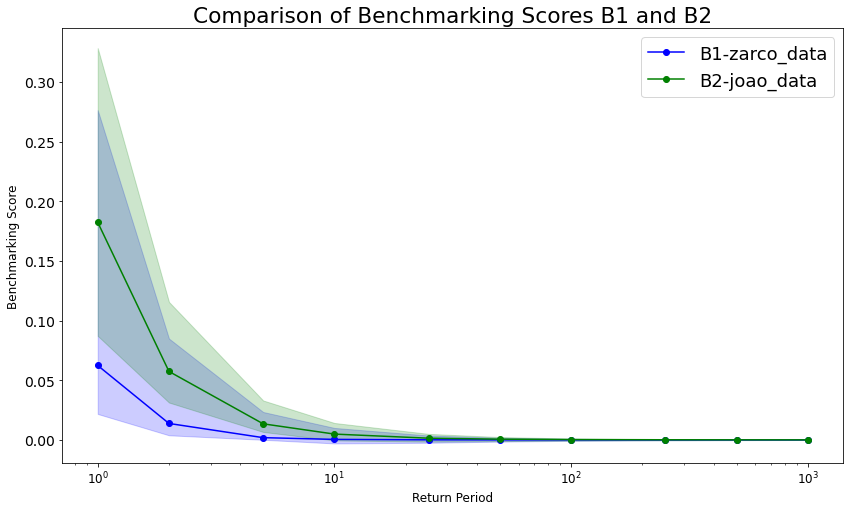

In [587]:
# Plotting B1 and B2 on the same plot
# check if return periods the same :
# For the case we compare 2 
def PlotCheck(T1,T2):
    if T1==T2:
        T= T1
        plt.figure(figsize=(14, 8))
        plt.plot(T, B1, marker='o', label='B1-zarco_data', color='blue')
        plt.plot(T, B2, marker='o', label='B2-joao_data', color='green')
        plt.fill_between(T, Blower1, Bupper1, color='blue', alpha=0.2)
        plt.fill_between(T, Blower2, Bupper2, color='green', alpha=0.2)
        plt.xticks(fontsize=12)
            
        plt.yticks(fontsize=14)

        plt.xlabel('Return Period', fontsize=12)
        plt.ylabel('Benchmarking Score',fontsize=12)
        plt.title('Comparison of Benchmarking Scores B1 and B2')
        plt.xscale('log')

        plt.legend()
        plt.show()
    else:
        return 'Return periods are not the same'
PlotCheck(T1,T2)



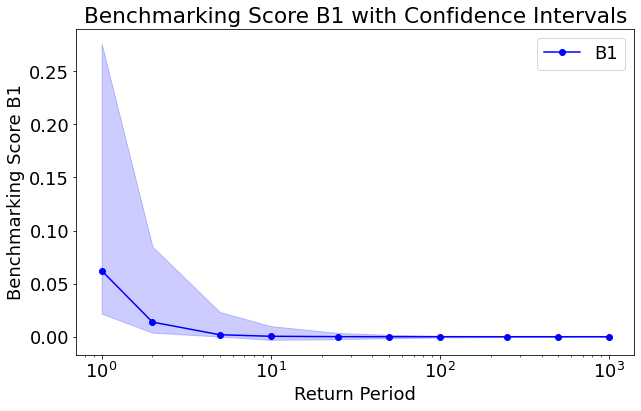

In [588]:
# Plotting B1 with its confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(T1, B1, marker='o', color='blue', label='B1')
plt.fill_between(T1, Blower1, Bupper1, color='blue', alpha=0.2)
plt.xlabel('Return Period')
plt.ylabel('Benchmarking Score B1')
plt.title('Benchmarking Score B1 with Confidence Intervals')
plt.xscale('log')
plt.legend()
plt.show()

**Comparing weights accross Cases as an additional XAI layer**

[0.05 0.1  0.1  0.05 0.3  0.2 ]
[0.05 0.1  0.1  0.05 0.3  0.2 ]


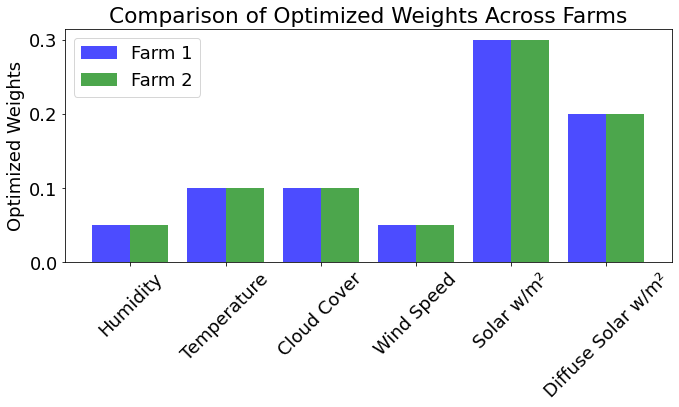

In [589]:
# Optimized weights for two cases
weights_farm1 = weightsScenario1 # From optimize_weights_eva for Farm 1
weights_farm2 = weightsScenario2 # From optimize_weights_eva for Farm 2

print(weights_farm1)
print(weights_farm2)

# Variable labels
variables = ["Humidity", "Temperature", "Cloud Cover", "Wind Speed", "Solar w/m²", "Diffuse Solar w/m²"]

# Visualize weights
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(variables))  # Variable indices

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, weights_farm1, width=0.4, label="Farm 1", color="blue", alpha=0.7)
plt.bar(x + 0.2, weights_farm2, width=0.4, label="Farm 2", color="green", alpha=0.7)
plt.xticks(x, variables, rotation=45)
plt.ylabel("Optimized Weights")
plt.title("Comparison of Optimized Weights Across Farms")
plt.legend()
plt.tight_layout()
plt.show()

In [590]:
print("Normalized Variables for Farm 1:", Normalized1b.head())
print("Normalized Variables for Farm 2:", Normalized2b.head())


Normalized Variables for Farm 1: Humidity         0.483587
Temperature      0.518681
cloudcover       0.554571
windspeedKmph    0.453125
Solar w/m2       0.334679
dtype: float64
Normalized Variables for Farm 2: Humidity         0.481159
Temperature      0.538647
cloudcover       0.582029
windspeedKmph    0.307044
Solar w/m2       0.340758
dtype: float64
